In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

%load_ext autoreload
%autoreload 2

In [2]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

In [3]:
params = Params.from_dict(PARAMS_DICT)
#params = Params(ntrials=5)
s = ParallelSimulation(params)

stim = 500
K = 5.0
initI = 0.8
result = s.simulate(stim, K, initI)

Help on Params in module onetwogo object:

class Params(builtins.object)
 |  Params(Wut=6, Wuv=6, Wvt=6, Wvu=6, dt=10, tau=150, sigma=0.01, th=0.65, IF=50, ntrials=100, uinit=0.7, vinit=0.2, yinit=0.5, first_duration=750, delay=500)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, Wut=6, Wuv=6, Wvt=6, Wvu=6, dt=10, tau=150, sigma=0.01, th=0.65, IF=50, ntrials=100, uinit=0.7, vinit=0.2, yinit=0.5, first_duration=750, delay=500)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  from_dict(PARAMS_DICT)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {'Wut': <class 'float'>, 'Wuv': <class 'f

In [19]:
result.create_simulation_plot_data()

In [20]:
result.simulation[:,1].shape[-1]

100

Stimulus: 500 , Production trial 5 (blue)): 510


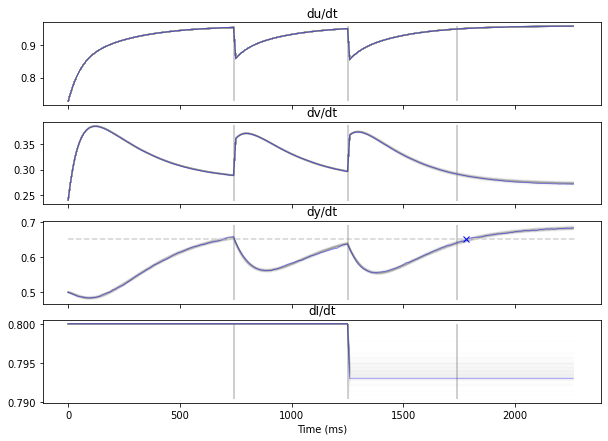

In [21]:
plot = SimulationPlot(result.create_simulation_plot_data())
plot.plot_trials(0.01)
plot.plot_example_trial(stim)

800
500
600
400
600


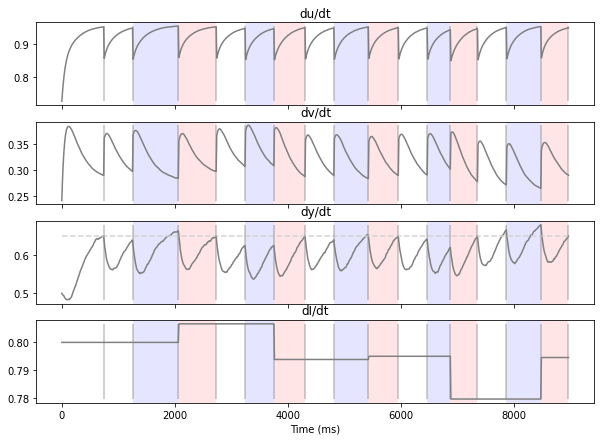

In [23]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 5})
s = ExperimentSimulation(params)

#stimulus_lst = [1000,400, 800, 400]
stimulus_range = [400,500,600,700,800]
stimulus_lst = s.generate_stimulus_lst(stimulus_range)
K = 5.0
initI = 0.8
result = s.simulate(stimulus_lst, K, initI)

alpha = 1
#plot = SimulationPlot(result.create_simulation_plot_data())
plot = result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()